In [1]:
from __future__ import print_function, division

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import pdb

In [2]:
points = np.array([[1.,0.], [0.,1.],[1.,2.],[2.,1.],[1.,1.],[.5,0.6],[1.3,1.28],[0.3,0.8],[.72,.38]])

from scipy.spatial import ConvexHull
hull = ConvexHull(points)

print(points)
print(hull.simplices)
print(hull.vertices)

[[ 1.    0.  ]
 [ 0.    1.  ]
 [ 1.    2.  ]
 [ 2.    1.  ]
 [ 1.    1.  ]
 [ 0.5   0.6 ]
 [ 1.3   1.28]
 [ 0.3   0.8 ]
 [ 0.72  0.38]]
[[2 1]
 [2 3]
 [0 1]
 [0 3]]
[2 1 0 3]


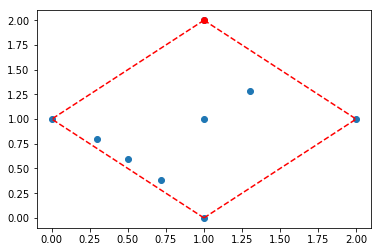

In [3]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r--')
    
# plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

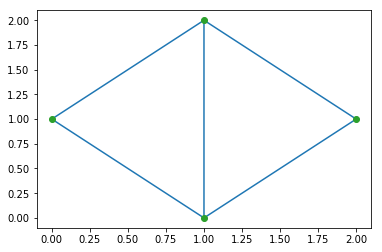

In [4]:
hull_points = np.array([points[i] for i in hull.vertices])

from scipy.spatial import Delaunay
tri = Delaunay(hull_points)
import matplotlib.pyplot as plt
plt.triplot(hull_points[:,0], hull_points[:,1], tri.simplices.copy())
plt.plot(hull_points[:,0], hull_points[:,1], 'o')
plt.show()

[[[-0.5  0.5]
  [-0.5 -0.5]
  [ 2.   1. ]]

 [[ 0.5 -0.5]
  [ 0.5  0.5]
  [ 0.   1. ]]]


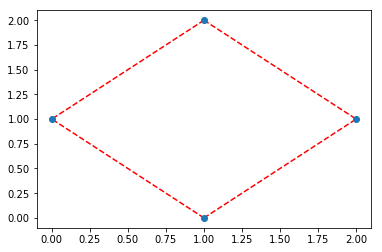

[[ 1.  2.]
 [ 0.  1.]
 [ 1.  0.]
 [ 2.  1.]]


array([0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int32)

In [9]:
print(tri.transform)
# print(tri.convex_hull)
for simplex in tri.convex_hull:
    plt.plot(tri.points[simplex, 0], tri.points[simplex, 1], 'r--')
plt.plot(tri.points[:,0], tri.points[:,1], 'o')
plt.show()

print(tri.points)

In [11]:
simplices = tri.find_simplex(points)
barycentric = np.array([transform[i,:2,:2]*(p-transform[i,2,:])] for i, p in zip(simplices, points) )
    
print(barycentric)

<generator object <genexpr> at 0x108360780>
